# Generating Poems with HMM

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import os
import numpy as np
from IPython.display import HTML

from hmm import unsupervised_HMM
import preprocess
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    generate_poem
)
print("SOMETHING HAPPENING")

getting token
getting token
{"'gainst": 1, "'greeing": 2, "'scaped": 1, "'tis": 1, "'twixt": 1, 'a': 1, 'a-doting': 3, 'abhor': 2, 'abide': 2, 'able': 2, 'about': 2, 'above': 2, 'absence': 2, 'absent': 2, 'abundance': 3, 'abundant': 3, 'abuse': 2, 'abused': 2, 'abuses': 3, 'abysm': 2, 'accents': 2, 'acceptable': 4, 'acceptance': 3, 'accessary': 4, 'accident': 3, 'accidents': 3, 'account': 2, 'accumulate': 4, 'accuse': 2, 'accusing': 3, 'achieve': 2, 'acknowledge': 3, 'acquaintance': 3, 'acquainted': 3, 'act': 1, 'action': 2, 'active': 2, 'actor': 2, 'add': 1, 'added': 2, "adder's": 2, 'addeth': 2, 'adding': 2, 'addition': 3, 'adieu': 2, 'adjunct': 2, 'admire': 2, 'admired': 3, 'admiring': 3, 'admit': 2, 'admitted': 3, 'adonis': 3, 'adore': 2, 'adulterate': 3, 'advance': 2, 'advantage': 3, 'adverse': 2, 'advised': 2, 'advocate': 3, 'afar': 2, 'affable': 3, 'affairs': 2, 'affections': 3, 'afford': 2, 'affords': 2, 'afloat': 2, 'afresh': 2, 'after': 2, 'after-loss': 3, 'afterwards': 3, 'a

SOMETHING HAPPENING


## Visualization of the Sonnets

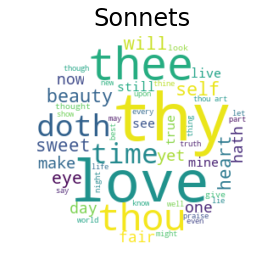

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Sonnets')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [3]:
#obs, obs_map = parse_observations(text)
genres, genre_map = preprocess.process_shakespeare()

observations = set()
for x in genres:
    observations |= set(x)


getting token
processing


In [ ]:
hmm8 = unsupervised_HMM(genres, 10, 100)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

In [ ]:
visualize_sparsities(hmm8, O_max_cols=5000)

## Generating a sample sentence AND poem

In [ ]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, genre_map, n_words=25))

In [ ]:
syllable_dict = preprocess.syllable_lookup()
print(generate_poem(hmm8, genre_map, syllable_dict, 14, 10))

## Part H: Using varying numbers of hidden states

In [10]:
hmm20 = unsupervised_HMM(genres, 20, 100)
print('\nSample Poem:\n====================')
print(generate_poem(hmm20, genre_map, syllable_dict, 14, 10))

KeyboardInterrupt: 

In [ ]:
hmm40 = unsupervised_HMM(genres, 40, 100)
print('\nSample Poem:\n====================')
print(generate_poem(hmm40, genre_map, syllable_dict, 14, 10))

In [4]:
syllable_dict = preprocess.syllable_lookup()
print('\nSample Poem:\n====================')
print(generate_poem(hmm40, genre_map, syllable_dict, 14, 10))

getting token

Sample Poem:


NameError: name 'hmm40' is not defined

In [ ]:
hmm60 = unsupervised_HMM(genres, 60, 100)
print('\nSample Poem:\n====================')
print(generate_poem(hmm60, genre_map, syllable_dict, 14, 10))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

In [ ]:
wordclouds = states_to_wordclouds(hmm40, genre_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

In [ ]:
anim = animate_emission(hmm40, obs_map, M=8)
HTML(anim.to_html5_video())